# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<b>Is the distribution of body temperatures normal?</b>

 test_1 p-value: 0.514
 test_2 p-value: 0.042
 test_3 p-value: 0.158
 Note: if all p-values are above 0.05, then we cannot reject the null hypothesis (i.e normally distributed)


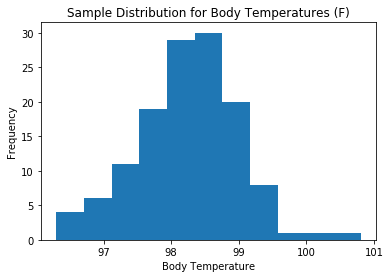

In [34]:
# Ho = Dataset is normally distributed, Ha = Dataset isn't normally distributed
# Is our 130 data points representative of the population? Let's perform a Shapiro-Wilk test to see if our p-value is < 0.05. 
# If so, reject the null hypothesis.

#Calculate basic sample metrics for later use (count, mean, and standard deivation)
samp_count = len(df['temperature'])
samp_mu = df['temperature'].mean()
samp_sigma = df['temperature'].std()

#Plot in histogram and boxplot to do quick visual check 
n_bins = int(np.sqrt(samp_count))
plt.hist(df['temperature'], bins=n_bins)
plt.title('Sample Distribution for Body Temperatures (F)');
plt.xlabel('Body Temperature');
plt.ylabel('Frequency');

#Visually, the distribution looks approximately normal with some skew to the right.Let's run a test with different sample sizes
#and random variables to see if the p-values will be below 0.05.

#Using sample data mean and standard deviation as input, calculating random values with varying sample sizes 
test_1 = stats.norm.rvs(loc=samp_mu, scale=samp_sigma, size=10)
test_2 = stats.norm.rvs(loc=samp_mu, scale=samp_sigma, size=100)
test_3 = stats.norm.rvs(loc=samp_mu, scale=samp_sigma, size=1000)

#Using Shapiro-Wilk test, calculating p-values to determine normality
print(' test_1 p-value: ' + str(round((stats.shapiro(test_1)[1]),3)) + '\n', 
      'test_2 p-value: ' + str(round((stats.shapiro(test_2)[1]),3)) + '\n', 
      'test_3 p-value: ' + str(round((stats.shapiro(test_3)[1]),3)) + '\n', 
      'Note: if all p-values are above 0.05, then we cannot reject the null hypothesis (i.e normally distributed)')

<b>Is the sample size large? Are the observations independent?</b>

The sample size is large enough with sufficient observations around the mean (>10) and is normally distributed. We can also assume the obervations are independent given the sample size is less than 10% of the total population. 

<b>Is the true population mean really 98.6 degrees F?</b>

In [22]:
#Determine how many standard deviations the sample mean is from the stated population mean using z and t statistics
#Z-statistic
z_stat = (samp_mu - 98.6) / (samp_sigma / np.sqrt(samp_count)) #Ok to use samp_sigma if our sample size is > 30.
p_value = stats.norm.cdf(abs(z_stat)) * 2

alpha = 0.05
if p_value > alpha:
   print('z-statistic = %.2f p_value = %.2f' % (z_stat, p_value) + '; Mean is not 98.6, reject the null hypothesis') 
else: 
   print('z-statistic = %.2f p_value = %.2f' % (z_stat, p_value) + '; Mean is 98.6, cannot reject the null hypothesis') 

z-statistic = -5.45 p_value = 2.00; Mean is not 98.6, reject the null hypothesis


<b><size=+2>Some notes on metholodogies chosen and use of certain tests:</size></b>

1) We're using a one-sample test since we're trying to compare a sample mean with a known population mean (98.6) to determine if there is a difference.

2) The major difference between using a z-score (typically uses population standard deviation) and a t-statistic is that you have to estimate the population standard deviation. Since our sample size is greater than 30, we can use the z-score for our estimations and the t-statistic isn't needed. The t-statistic is typically used for small samples (less than 30), where we don't have the population standard deviation. 

<b> At what temperature should we consider someone's temperature to be "abnormal"? </b>

Typically, when a person's temperature exceeds three standard deviation's from a normal mean temperature, we'd consider this to be "abnormal".

Normal body temperature is between: 96.81 to 99.69


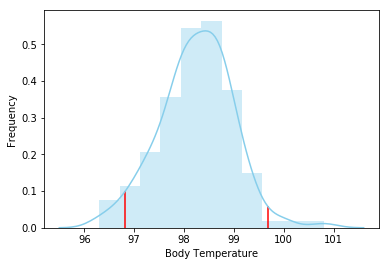

In [35]:
#Calculate confidence interval to determine three sd line
moe = 1.96 * samp_sigma #Where 1.96 is the z-statistic for three SD's
conf_int = samp_mu + np.array([-1, 1]) * moe

ax = sns.distplot(df['temperature'], bins=n_bins, kde=True, color='skyblue', hist={"linewidth": 15,'alpha':1})
ax.set(xlabel='Body Temperature', ylabel='Frequency')
plt.vlines(conf_int[0], ymin=0, ymax=0.1, color='red')
plt.vlines(conf_int[1], ymin=0, ymax=0.06, color='red')

print('Normal body temperature is between: %.2f to %.2f' % (conf_int[0],conf_int[1]))

<b>Is there a significant difference between males and females in normal temperature?</b>

We know that we can subtract the mean's from both populations, but we cannot subtract/add standard deviations, only variances. In order to answer this question, we will need both components. 

t-statistic = 2.29 | p_value = 0.02; Men and Women have different average body temperatures, cannot reject the null hypothesis


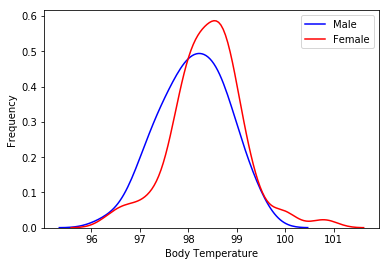

In [33]:
#Female dataframe and metrics
female_df = df.loc[df['gender'] == 'F', :]
female_count = len(female_df)
female_mu = female_df['temperature'].mean()
female_sigma = female_df['temperature'].std()

#Male dataframe and metrics
male_df = df.loc[df['gender'] == 'M', :]
male_count = len(male_df)
male_mu = male_df['temperature'].mean()
male_sigma = male_df['temperature'].std()

#Plot each distribution
ax = sns.distplot(male_df['temperature'], bins=n_bins, color='blue', label = 'Male', hist=False)
ax = sns.distplot(female_df['temperature'], bins=n_bins, color='red', label = 'Female', hist=False)
ax.set(xlabel='Body Temperature', ylabel='Frequency')

#Calculate two-tailed t-statistic, p-value to test for significant difference in body temperatures
two_samp_tstat = (female_mu - male_mu) / np.sqrt((male_sigma**2/male_count) + (female_sigma**2/female_count))
p_value_mf_diff = stats.t.sf(abs(two_samp_tstat), samp_count - 2) * 2

alpha = 0.05
if p_value_mf_diff > alpha:
   print('t-statistic = %.2f | p_value = %.2f' % (two_samp_tstat, p_value_mf_diff) + '; Men and Women have same average body temperature, reject the null hypothesis') 
else: 
   print('t-statistic = %.2f | p_value = %.2f' % (two_samp_tstat, p_value_mf_diff) + '; Men and Women have different average body temperatures, cannot reject the null hypothesis') 